<a href="https://colab.research.google.com/github/Darkling-01/Airbnb-Machine-Learning/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is for Machine Learning CSE5160

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from google.colab import files

print("SETUP COMPLETE...")

SETUP COMPLETE...


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [208]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/airbnb_data.csv')
dataset

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,14549287,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,...,40.709025,-73.939405,one room bushwick,Williamsburg,0,NaN,https://a0.muscache.com/im/pictures/55162426/6...,11206.0,1.0,1.0
74107,13281809,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,moderate,True,...,33.871549,-118.396053,Spacious Hermosa 2 BR on PCH,Hermosa Beach,16,93.0,https://a0.muscache.com/im/pictures/2b86560b-a...,90254,2.0,4.0
74108,18688039,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,1.0,Real Bed,moderate,True,...,40.706749,-73.942377,Modern 2 Bedroom Apartment in Williamsburg,Williamsburg,43,94.0,https://a0.muscache.com/im/pictures/7fbe448c-5...,11206.0,2.0,2.0
74109,17045948,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,True,...,40.738535,-74.000157,Designer's Apartment in HEART of NYC,West Village,0,NaN,https://a0.muscache.com/im/pictures/b3971b63-0...,10011,0.0,2.0


In [165]:
print('Number of rows in the dataframe:', dataset.shape[0])
print('Number of columns in the dataframe:', dataset.shape[1])

Number of rows in the dataframe: 74111
Number of columns in the dataframe: 29


In [166]:
dataset.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [175]:
#finding attitional info about our data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [209]:
#selecting features that I will be using for the model
data = dataset[['log_price', 'id', 'review_scores_rating', 'number_of_reviews', 'accommodates', 'bathrooms']]
data.head()

,log_price,id,review_scores_rating,number_of_reviews,accommodates,bathrooms
0,5.010635,6901257,100.0,2,3,1.0
1,5.129899,6304928,93.0,6,7,1.0
2,4.976734,7919400,92.0,10,5,1.0
3,6.620073,13418779,NaN,0,4,1.0
4,4.744932,3808709,40.0,4,2,1.0


In [246]:
#Remove NaN from review_scores_rating
# Create the dataframe
data = data.dropna(subset=['review_scores_rating'])
# dropping the rows having NaN values
data = data.dropna()
# printing the result
data

,log_price,id,review_scores_rating,number_of_reviews,accommodates,bathrooms
0,5.010635,6901257,100.0,2,3,1.0
1,5.129899,6304928,93.0,6,7,1.0
2,4.976734,7919400,92.0,10,5,1.0
4,4.744932,3808709,40.0,4,2,1.0
5,4.442651,12422935,100.0,3,2,1.0
...,...,...,...,...,...,...
74104,4.356709,14934112,100.0,6,2,1.0
74105,4.248495,808802,91.0,36,2,1.0
74107,5.043425,13281809,93.0,16,4,2.0
74108,5.220356,18688039,94.0,43,5,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f741efb6410>,
      dtype=object)

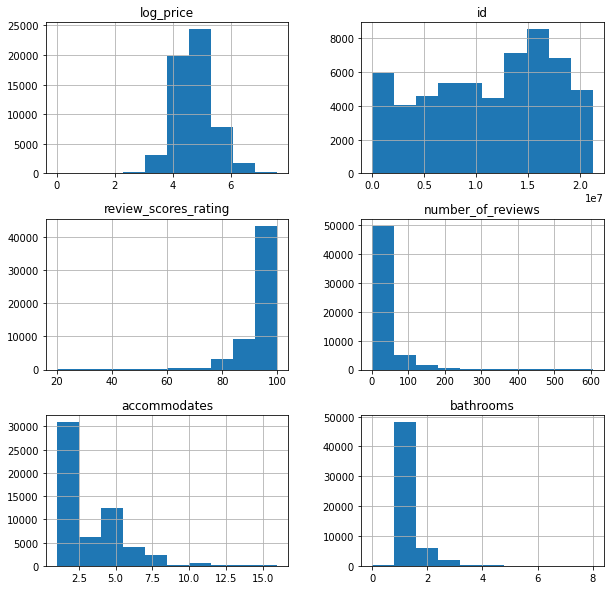

In [245]:
#plot data with its value count
data.hist(figsize = (10,10))

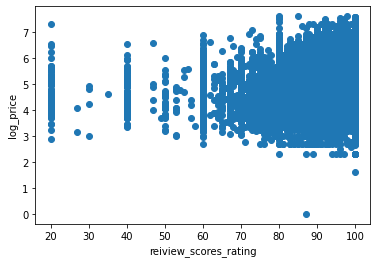

In [107]:
plt.scatter(data['review_scores_rating'], data['log_price'])
plt.xlabel("reiview_scores_rating")
plt.ylabel("log_price")
plt.show()

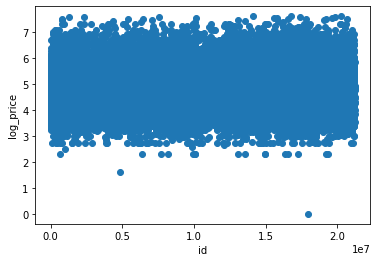

In [108]:
plt.scatter(data['id'], data['log_price'])
plt.xlabel("id")
plt.ylabel("log_price")
plt.show()

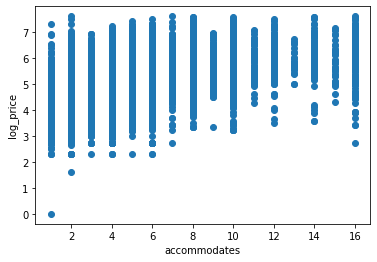

In [109]:
plt.scatter(data['accommodates'], data['log_price'])
plt.xlabel("accommodates")
plt.ylabel("log_price")
plt.show()

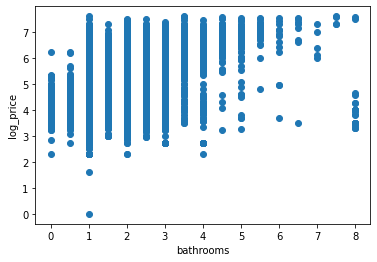

In [193]:
plt.scatter(data['bathrooms'], data['log_price'])
plt.xlabel("bathrooms")
plt.ylabel("log_price")
plt.show()

In [236]:
#80% data for training and 20% for testing
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

print("Training Data: ", train.shape)
print("Testing Data: ", test.shape)
print("Total Data: ", data.shape)

Training Data:  (59288, 6)
Testing Data:  (14823, 6)
Total Data:  (74111, 6)


In [237]:
#finding the mean of log_price
price = data['log_price']
sum_price = price.sum()
num_places = len(price)
avg_prices1 = sum_price/num_places
avg_prices2 = price.mean()
print(avg_prices1)
print(avg_prices2)

4.782069108305636
4.782069108305636


In [238]:
from seaborn.widgets import interact
#main function to find slope and intercept
def simple_linear_regression(intput_feature, output):
  Xi = intput_feature
  Yi = output
  N = len(Xi)

  Yi_mean = Yi.mean()
  Xi_mean = Xi.mean()

  S_YiXi = (Yi * Xi).sum()
  Yi_Xi_ByN = (Xi.sum() * Xi.sum()) / N

  S_XiXi = (Xi * Xi).sum()
  XiXi_ByN = (Xi.sum() * Xi.sum()) / N

  slope = (S_YiXi - Yi_Xi_ByN) / (S_XiXi - XiXi_ByN)

  intercept = Yi_mean - slope * Xi_mean

  return (intercept, slope)

In [239]:
#testing the function with data
test_feature = np.array(range(5))
test_output = np.array(1 + 1 * test_feature)

(test_intercept, test_slope) = simple_linear_regression(test_feature, test_output)

print("Intercept: ", test_intercept)
print("Slope: ", test_slope)

Intercept:  -1.0
Slope:  2.0


#Inspect the negative values and why do i have them...!

In [240]:
#finding the slope and intercept for our actual data
log_intercept, log_slope = simple_linear_regression(train['log_price'], train['review_scores_rating'])

print("Intercept: ", log_intercept)
print("Slope: ", log_slope)

Intercept:  -2914.7989028350694
Slope:  629.2809407494013


In [241]:
#Equation of line:
print("Y = ", log_intercept, "*X + ", log_slope)

Y =  -2914.7989028350694 *X +  629.2809407494013


Text(0, 0.5, 'Log Price')

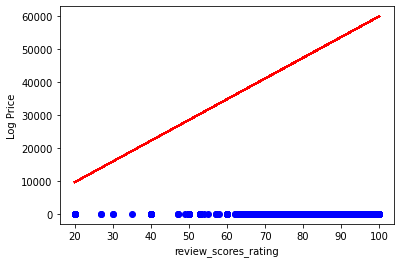

In [242]:
#plot the regression line to visualize it
#plotting regression line with data points

plt.scatter(train.review_scores_rating, train.log_price, color = "blue")
plt.plot(train["review_scores_rating"], log_slope*train["review_scores_rating"] + log_intercept, '-r')
plt.xlabel("review_scores_rating")
plt.ylabel("Log Price")

In [243]:
#predict the values with our model
def get_regression_predictions(intput_feature, intercept, slope):
  predicted_values = intput_feature * slope + intercept

  return predicted_values

In [247]:
my_review = 10

estimatd_log_price = get_regression_predictions(my_review, log_intercept, log_slope)
print("Estimated Log Price: ", estimatd_log_price)

Estimated Log Price:  3378.0105046589442


In [248]:
# Here are methods in how our prediction performance is testing the values. Error/accuracy

#calculating the error in prediction:
def residual_sum_of_squares(intput_feature, output, intercept, slope):
  prediction = intput_feature * slope + intercept

  residual = output - prediction
  RSS = (residual * residual).sum()

  return (RSS)

In [250]:
#calculate the error for our test dataset
print(residual_sum_of_squares(test["review_scores_rating"], test['log_price'], log_intercept, log_slope))

36614148253536.14


In [ ]:
#calculate the error for our train dataset
print(residual_sum_of_squares(test["review_scores_rating"], test['log_price'], log_intercept, log_slope))